# Integrador del Módulo 6

## Realizamos la Extracción, Transformación y Carga

#### Se realiza el ETL sobre el dataframe provisto por el cliente.

##### Importamos las librerías

In [652]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import herramientas
import os
import warnings
warnings.simplefilter("ignore")


##### Cargamos el Dataframe (Extracción)

In [653]:
df=pd.read_excel(r"Datasets/BBDD_Hospitalización.xlsx")

<br>
<br>

#### Realizamos una descripción general de los datos y luego su Transformación

#### Se realiza una exploración de los datos, para conocer su estructura y tipos de datos, para obtener la información. 

In [654]:
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [655]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

<br>
<br>

#### Visualizamos los valores nulos y procedemos a la imputación de 2 filas de datos, que contienen la mayoría de los datos Nan

<br>


In [656]:
df.isna().sum()

EDAD                                                                          2
DIABETES                                                                      2
HOSPITALIZACIÓN ULTIMO MES                                                    2
PSA                                                                           6
BIOPSIAS PREVIAS                                                              4
VOLUMEN PROSTATICO                                                            3
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       2
NUMERO DE MUESTRAS TOMADAS                                                    2
CUP                                                                           3
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             4
BIOPSIA                                                                       2
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     2
FIEBRE                                  

In [657]:
df = df.dropna(subset=["EDAD"])

In [658]:
df.isna().sum()

EDAD                                                                          0
DIABETES                                                                      0
HOSPITALIZACIÓN ULTIMO MES                                                    0
PSA                                                                           4
BIOPSIAS PREVIAS                                                              2
VOLUMEN PROSTATICO                                                            1
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       0
NUMERO DE MUESTRAS TOMADAS                                                    0
CUP                                                                           1
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             2
BIOPSIA                                                                       0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     0
FIEBRE                                  

##### Modificamos los "Nan" en los campos donde existan, analizando previamente los valores a modificar, y utilizando un criterio lógico para el reemplazo de dichos valores, considernado que el Dataset tiene solo 570 filas, y si borramos filas por no tener valores en los campos, interferimos en gran medida en los resultados finales del modelo ML que aplicaremos.

In [659]:

df['PSA'] = df['PSA'].replace(to_replace=[0, pd.NA], method='ffill').round(2)
df['BIOPSIAS PREVIAS'] = df['BIOPSIAS PREVIAS'].fillna('NO')
df['VOLUMEN PROSTATICO']=df['VOLUMEN PROSTATICO'].fillna('Sin Datos')
df['CUP']=df['CUP'].fillna('NO')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].fillna('NO')
df['AGENTE AISLADO']=df['AGENTE AISLADO'].fillna('Sin Datos')
df['HOSPITALIZACION']=df['HOSPITALIZACION'].fillna('NO')


### Transformamos los tipos de datos

In [660]:
df['DIABETES'] = df['DIABETES'].astype('category')
df['HOSPITALIZACIÓN ULTIMO MES'] = df['HOSPITALIZACIÓN ULTIMO MES'].astype('category')
df['BIOPSIAS PREVIAS'] = df['BIOPSIAS PREVIAS'].astype('category')
df['VOLUMEN PROSTATICO'] = df['VOLUMEN PROSTATICO'].astype('category')
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].astype('category')
df['CUP'] = df['CUP'].astype('category')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].astype('category')
df['BIOPSIA'] = df['BIOPSIA'].astype('category')
df['FIEBRE'] =df['FIEBRE'].astype('category')
df['ITU'] =df['ITU'].astype('category')
df['TIPO DE CULTIVO'] =df['TIPO DE CULTIVO'].astype('str')
df['AGENTE AISLADO'] =df['AGENTE AISLADO'].astype('str')
df['PATRON DE RESISTENCIA'] =df['PATRON DE RESISTENCIA'].astype('category')
df['HOSPITALIZACION'] =df['HOSPITALIZACION'].astype('category')

### Realizamos la estandarización y correciones por columna categórica

##### Crearemos una columna que ayude a segmentar la columna 'ENF. CRONICA PULMONAR OBSTRUCTIVA'


In [661]:
# 1. Duplicamos la columna
df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].copy()
# 2. Corregimos la columna 'ENF. CRONICA PULMONAR OBSTRUCTIVA'
df['ENF. CRONICA PULMONAR OBSTRUCTIVA']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace({'SI, EPOC','SI, ASMA'},'SI')
# 3. Corregimos la columa 'ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO'
df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO'].replace('SI, EPOC','EPOC')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO'].replace('SI, ASMA','ASMA')



In [662]:
# Corregimos los valores duplicados
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].replace('FLUOROQUINOLONA_AMINOGLICÓSIDO', 'FLUOROQUINOLONA_AMINOGLICOSIDO')

##### Corregiremos la columna, recortando los espacios a los costados en los campos, evitando asi tener columnas duplicadas.

In [663]:

df['BIOPSIA']=df['BIOPSIA'].str.strip()

##### Se normalizan los valores de los campos en la columna Patron de Resistencia, haciendo mas claros los valores que se encuentran en ella

In [664]:
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].replace(' AMPI R, CIPRO R, GENTA R, SULFA M R', 
                                                                  'R AMPI, R CIPRO, R GENTA, R SULFA')
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].replace('RESISTENTE A AMPI, CIPRO Y GENTA', 
                                                                  'R AMPI, R CIPRO, R GENTA')
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].replace('RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA', 
                                                                  'R AMPI, R SULFA, R CEFADROXILO, R CEFUROXIMO, R CIPRO, R CEFEPIME, R CEFOTAXIMA')

##### Al analizar la cantidad de valores 'NO' que tiene la columna "NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA" y comparando con la información de las otras columnas, se asume que NO significa que la persona no tuvo internación, por lo que se cambiará ese valor por 0 días.

In [665]:
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace('NO', 0)
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].astype(int)
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].unique()

array([1, 2, 3, 5, 9, 0])

##### Corregimos los nombres de las columnas 

In [666]:
nombres_nuevos = {
    "EDAD": "Edad",
    "DIABETES": "Diabetes",
    "HOSPITALIZACIÓN ULTIMO MES": "Hosp_ult_mes",
    "BIOPSIAS PREVIAS": "Biopsias_prev",
    "VOLUMEN PROSTATICO": "Vol_prostatico",
    "ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS": "Antib_en_profilaxis",
    "NUMERO DE MUESTRAS TOMADAS": "Nro_muestras",
    "ENF. CRONICA PULMONAR OBSTRUCTIVA": "Epoc",
    "ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO": "Epoc tipo",
    "BIOPSIA": "Biopsia",
    "NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA": "Nro_dias_hasta_infecc",
    "FIEBRE": "Fiebre",
    "TIPO DE CULTIVO": "Tipo_cultivo",
    "AGENTE AISLADO": "Ag_aislado",
    "PATRON DE RESISTENCIA": "Patron_resistencia",
    "HOSPITALIZACION": "Hosp",
    "DIAS HOSPITALIZACION MQ": "Dias_hosp_mq",
    "DIAS HOSPITALIZACIÓN UPC": "Dias_hosp_upc"
}
df.rename(columns=nombres_nuevos, inplace=True)




In [667]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 0 to 567
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Edad                   568 non-null    float64 
 1   Diabetes               568 non-null    category
 2   Hosp_ult_mes           568 non-null    category
 3   PSA                    568 non-null    float64 
 4   Biopsias_prev          568 non-null    category
 5   Vol_prostatico         568 non-null    category
 6   Antib_en_profilaxis    568 non-null    category
 7   Nro_muestras           568 non-null    float64 
 8   CUP                    568 non-null    category
 9   Epoc                   568 non-null    category
 10  Biopsia                568 non-null    object  
 11  Nro_dias_hasta_infecc  568 non-null    int32   
 12  Fiebre                 568 non-null    category
 13  ITU                    568 non-null    category
 14  Tipo_cultivo           568 non-null    object  

##### Se cuenta con 568 registros, cuyos indices van del 0 al 567, y 20 columnas. Muchos de ellos del tipo objeto que han sido modificado a categoría, y se observaban algunas columnas con valores nulos por lo que se aplicó de forma criterioza una modificación en esos datos, borrando unicamente 2 filas de dataset original, que contenian la mayor cantidad de valores Nan en sus campos.

<br>
<br>

## Procedemos a la visualización de los datos y realizacion del EDA

#### Se observan el resumen estadístico para las variables numéricas y a continuación se visualizan las distribuciones de cada una de las columnas.

##### Resumen estadístico del estado actual de las variables categóricas

In [668]:
df.describe()

,Edad,PSA,Nro_muestras,Nro_dias_hasta_infecc,Dias_hosp_mq,Dias_hosp_upc
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,63.882042,13.233750,12.996479,0.132042,0.165493,0.014085
std,9.281517,15.620699,3.921180,0.745471,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000,0.000000
25%,59.000000,5.675000,12.000000,0.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,9.000000,12.000000,3.000000


+ Histograma y Boxplot de variables numéricas

Text(0.5, 1.0, 'Histograma de las Edades')

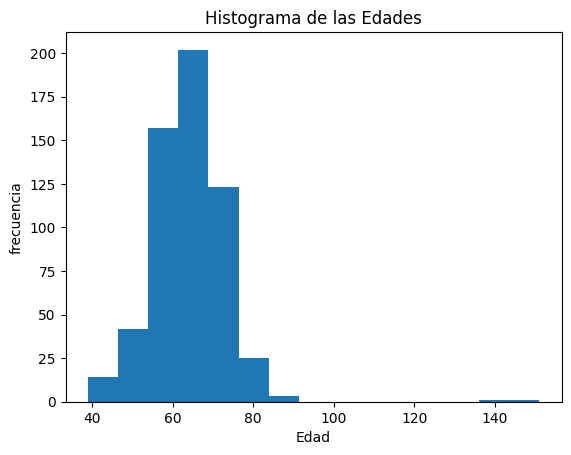

In [669]:
# Crea un histograma de la variable EDAD
plt.hist(df["Edad"],bins=15)
plt.xlabel("Edad")
plt.ylabel("frecuencia")
plt.title("Histograma de las Edades")

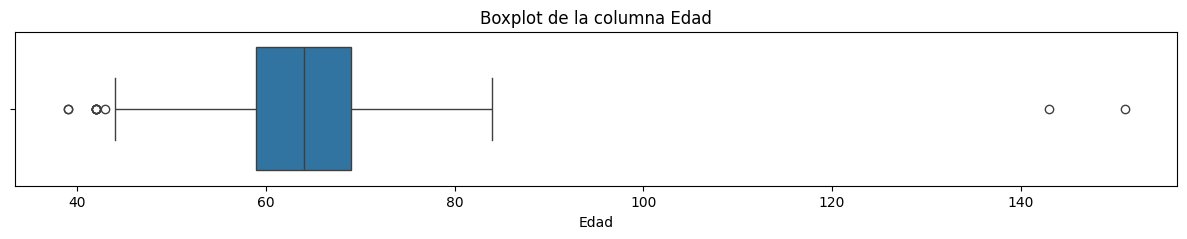

In [670]:
herramientas.boxplot(df, "Edad")

#### De las visualizaciones anteriores, se ve que la variable **edad** presenta claramente dos valores atípicos que pueden observarse en el boxplot, donde tales pacientes tendrían mas de 140 años, por lo tanto esos datos se decide borrarlos y recalcular las estadísticas.Tambien se puede ver que el 75% de las edades se encuentra entre los 39 y 69 años de edad, con una edad promedio de cerca de 64 años. Hay pacientes con mayor edad, llegando a los 84 años. Se aprecian tres casos de pacientes con edades atípicas por debajo de los 45 años.

In [671]:
# Borramos los Outliers
df["Edad"] = df["Edad"].where(df["Edad"] <= 100, df["Edad"].median())

Text(0.5, 1.0, 'Histograma de PSA')

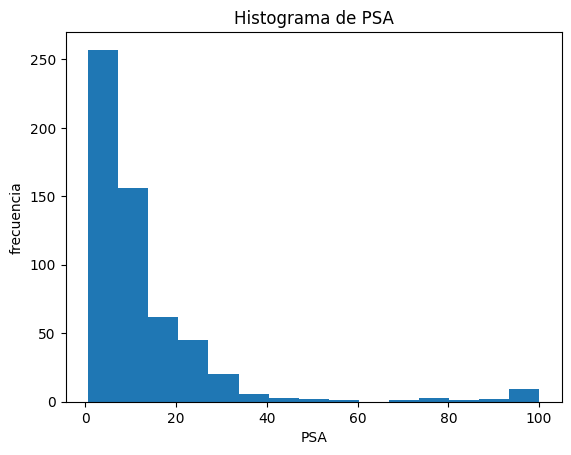

In [672]:
# Crea un histograma de la variable PSA
plt.hist(df["PSA"],bins=15)
plt.xlabel("PSA")
plt.ylabel("frecuencia")
plt.title("Histograma de PSA")

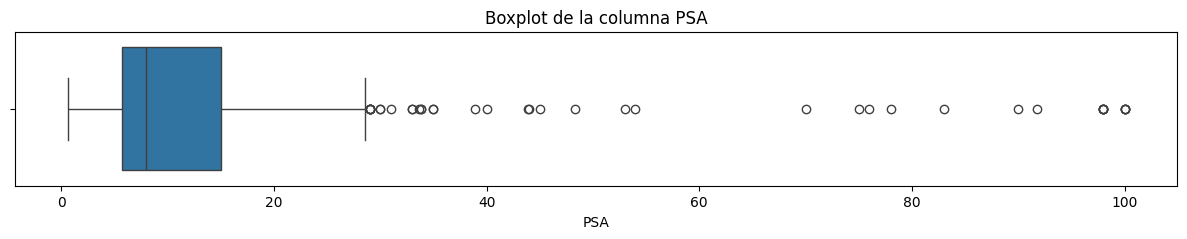

In [673]:
herramientas.boxplot(df, "PSA")

#### En cuanto a la variable **psa** se aprecia en la visualización que el 75% de los registros tienen concentraciones por debajo de los 16 ng/ml. Por otra parte, hay 29 pacientes que se ubican en por encima de los 31,45 ng/ml considerados estadísticamente atípicos. Si bien la bibliografía consultada no determina valores máximos para esta concentración pero sí indica que es posible hallar valores altos en situaciones específicas, entonces se decide dejarlos en el conjunto de datos.

Text(0.5, 1.0, 'Histograma de la Cantidad de Muestras Tomadas')

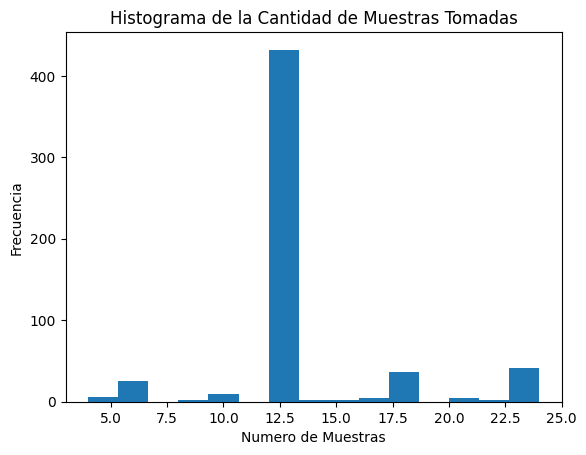

In [674]:
# Crea un histograma de la variable NUMERO DE MUESTRAS TOMADAS
plt.hist(df["Nro_muestras"],bins=15)
plt.xlabel("Numero de Muestras")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Cantidad de Muestras Tomadas")

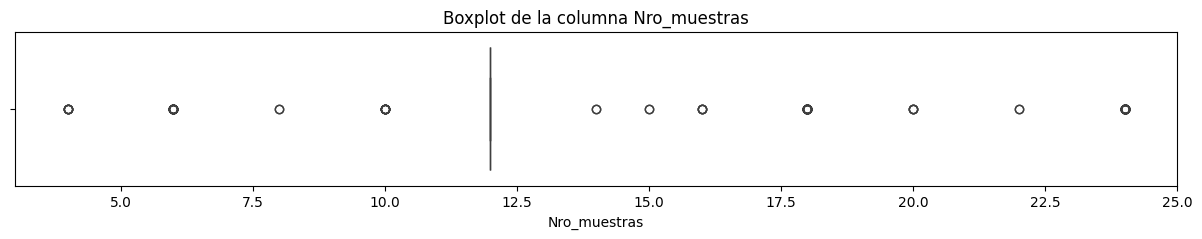

In [675]:
herramientas.boxplot(df, "Nro_muestras")

#### La variable **Nro_muestras** indica la cantidad de muestras que son tomadas al momento de la biopsia y se puede ver que se pareciera ser práctica común tomar 12 muestras dado que representan casi el 75% de los casos registrados. En algunos se llegaron a tomar 18 y 24 muestras.

Text(0.5, 1.0, 'Histograma de la Cantidad días Hospitalizado MQ')

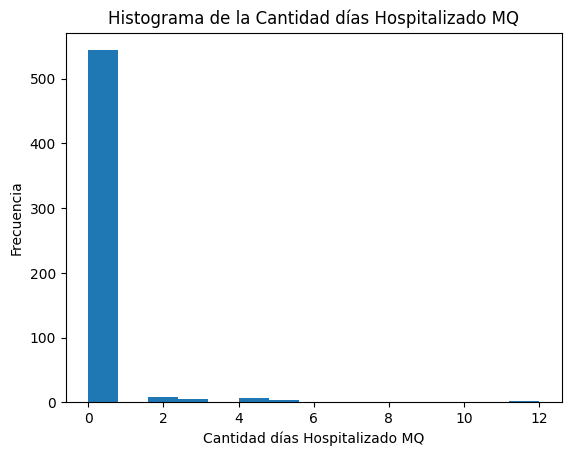

In [676]:
# Crea un histograma de la variable DIAS HOSPITALIZADOS MQ
plt.hist(df["Dias_hosp_mq"],bins=15)
plt.xlabel("Cantidad días Hospitalizado MQ")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Cantidad días Hospitalizado MQ")

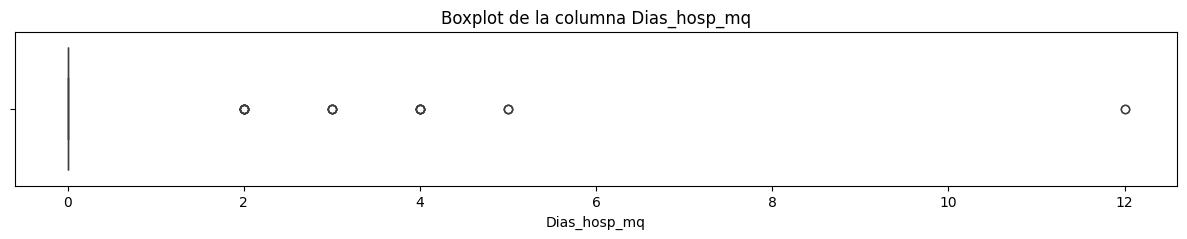

In [677]:
herramientas.boxplot(df, "Dias_hosp_mq")

Text(0.5, 1.0, 'Histograma de la Cantidad días Hospitalizado UPC')

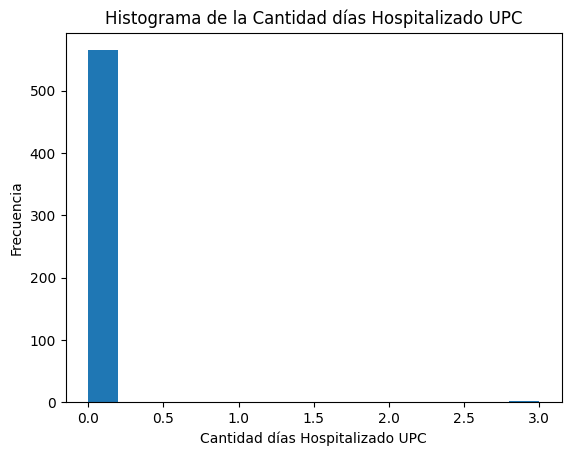

In [678]:
# # Crea un histograma de la variable DIAS HOSPITALIZADOS UPC
plt.hist(df["Dias_hosp_upc"],bins=15)
plt.xlabel("Cantidad días Hospitalizado UPC")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Cantidad días Hospitalizado UPC")

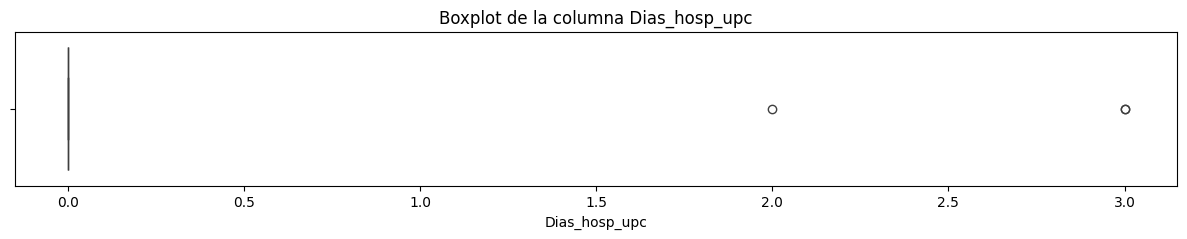

In [679]:
herramientas.boxplot(df, "Dias_hosp_upc")

#### En cuanto a las variables **Dias_hosp_mq** y **Dias_hosp_upc** se observan que son variables con 94.66% y 99.3% de valores 0, es decir, que el paciente no fue hospitalizado ni por razones médico quirúrgicas ni en estado crítico. Por otra parte, considerando que la varible objetivo es predecir qué pacientes serán o no hospitalizados, se considera que esta variable podría ser redundante. Se decide eliminar estas columnas del conjuto de datos.

In [680]:
df=df.drop(['Dias_hosp_mq'], axis=1)
df=df.drop(['Dias_hosp_upc'], axis=1)
df.columns

Index(['Edad', 'Diabetes', 'Hosp_ult_mes', 'PSA', 'Biopsias_prev',
       'Vol_prostatico', 'Antib_en_profilaxis', 'Nro_muestras', 'CUP', 'Epoc',
       'Biopsia', 'Nro_dias_hasta_infecc', 'Fiebre', 'ITU', 'Tipo_cultivo',
       'Ag_aislado', 'Patron_resistencia', 'Hosp', 'Epoc tipo'],
      dtype='object')

## Variables Categóricas

#### En primer lugar se observa el resumne estadísticos de las varables categóricas y luego se visualizan las distribuciones de cada variable.

In [681]:
df.describe(include=['category', 'object'])

,Diabetes,Hosp_ult_mes,Biopsias_prev,Vol_prostatico,Antib_en_profilaxis,CUP,Epoc,Biopsia,Fiebre,ITU,Tipo_cultivo,Ag_aislado,Patron_resistencia,Hosp,Epoc tipo
count,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568
unique,2,2,2,3,4,2,2,9,2,2,4,4,5,2,4
top,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO
freq,505,563,512,408,452,564,548,322,531,562,560,543,561,544,548


+ Distribución de variables categóricas

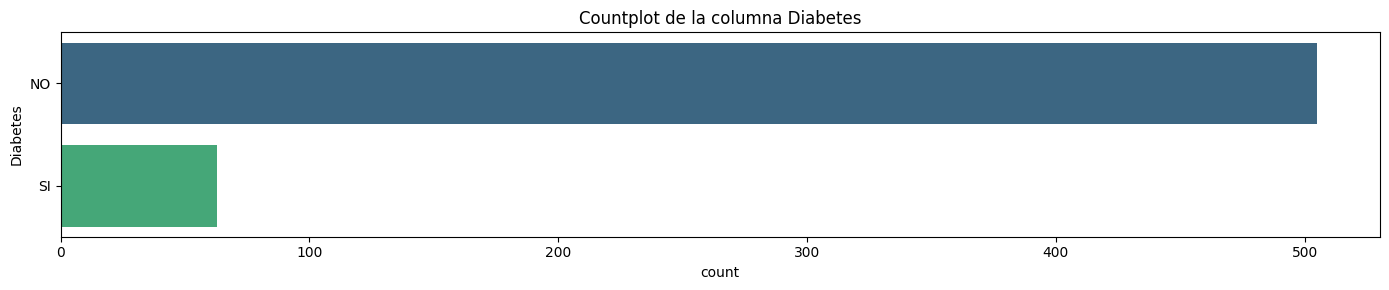

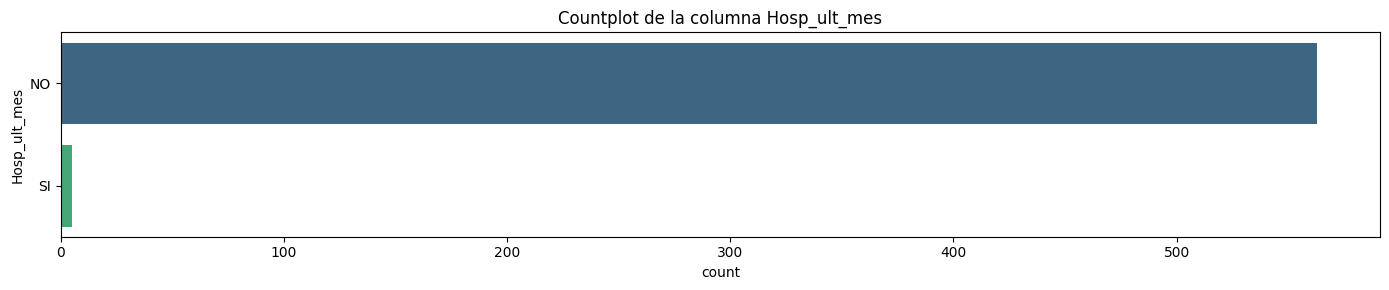

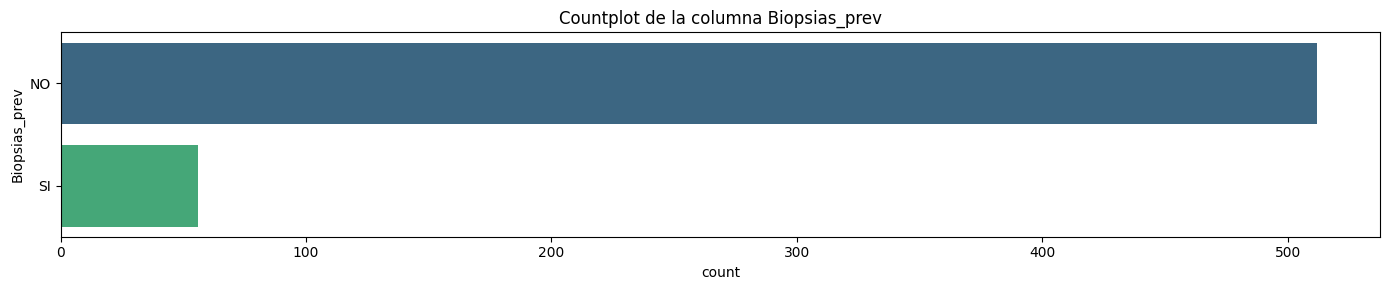

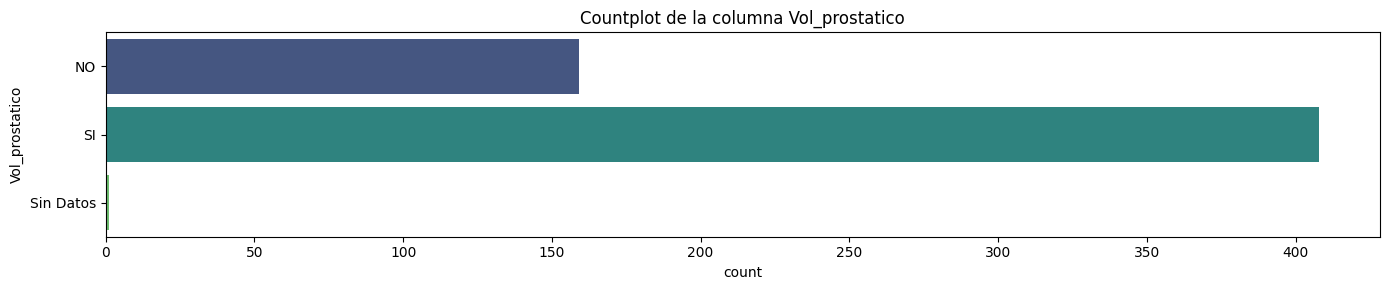

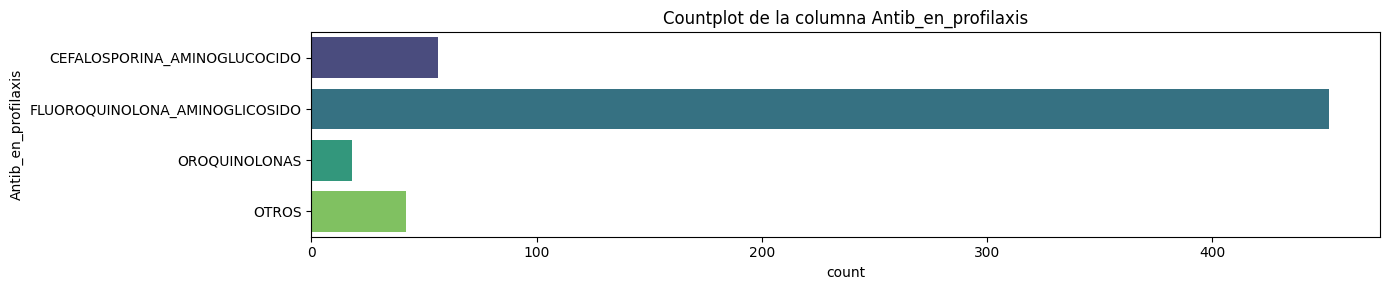

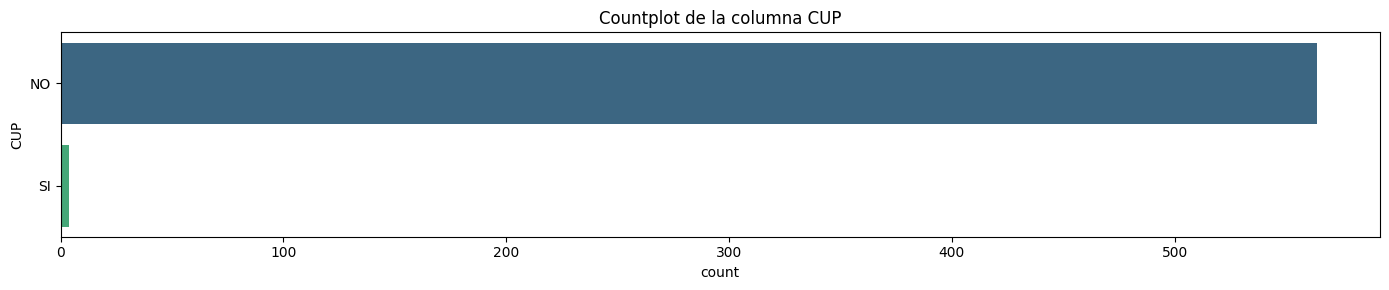

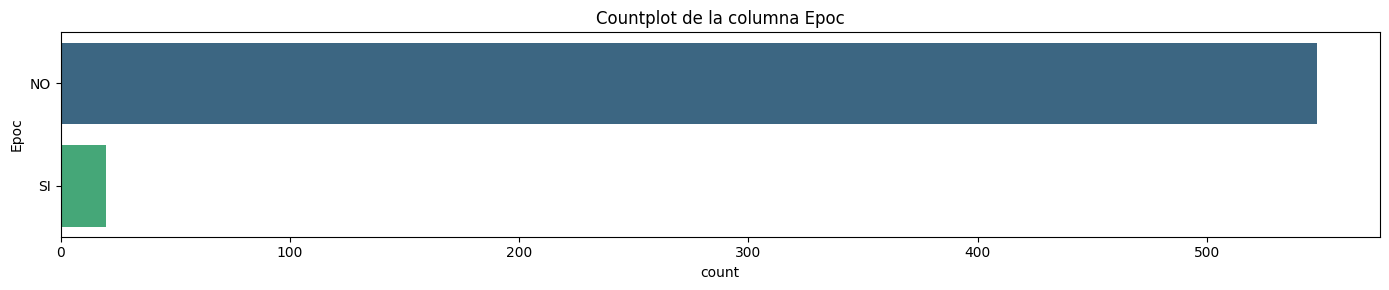

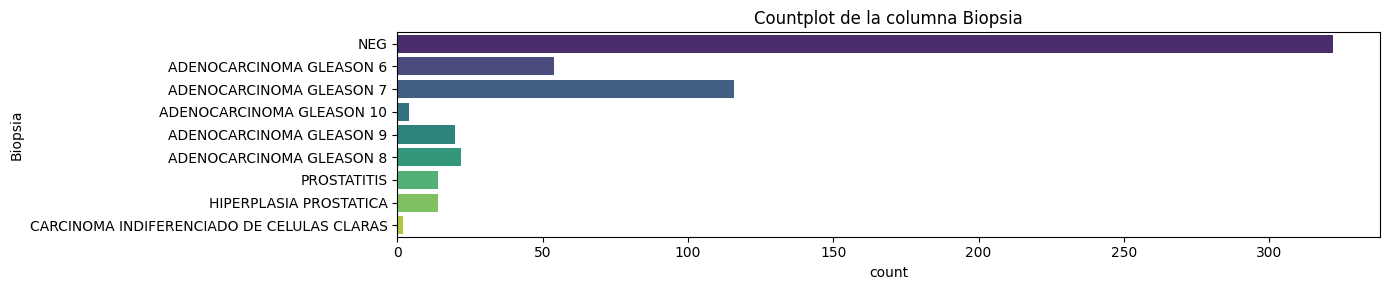

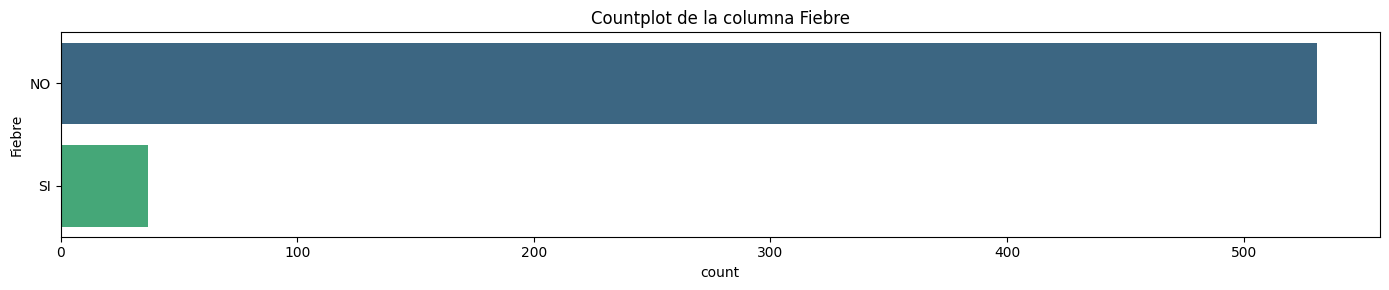

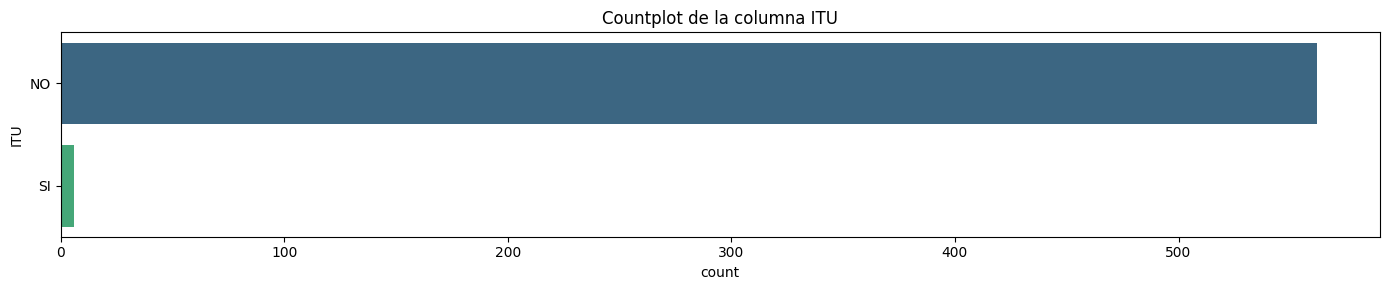

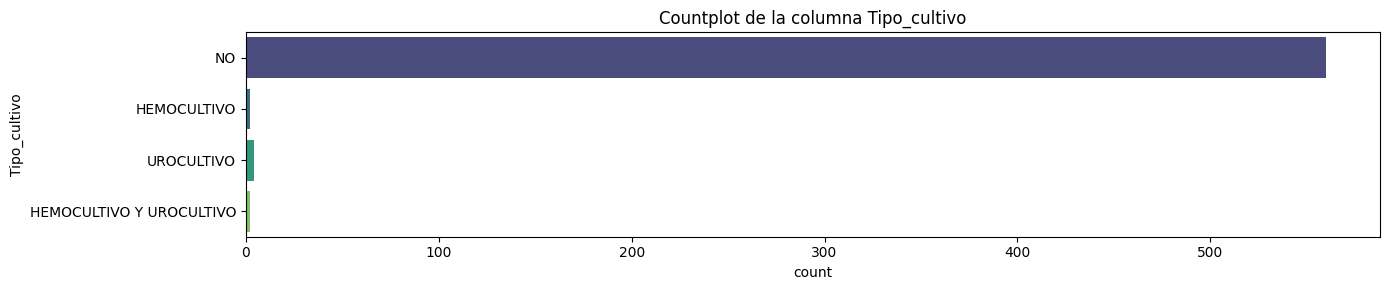

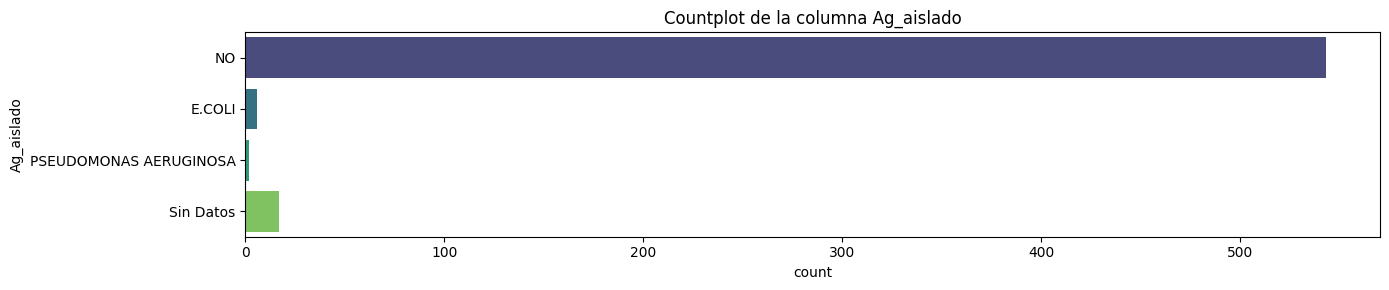

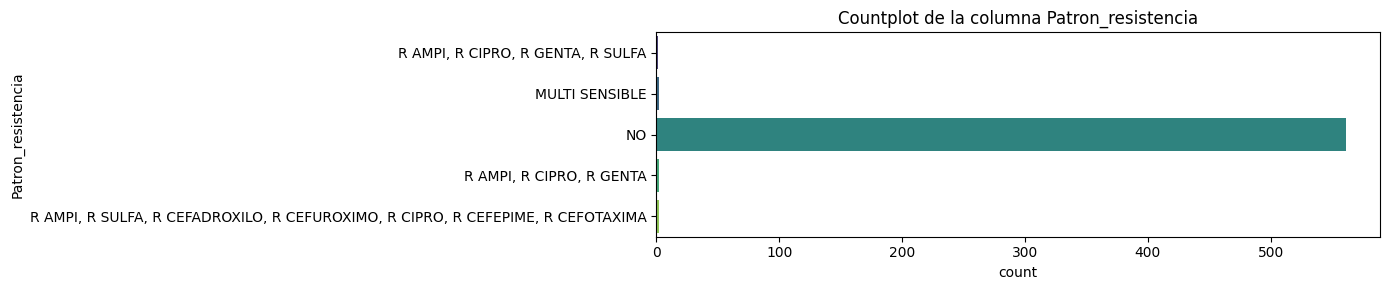

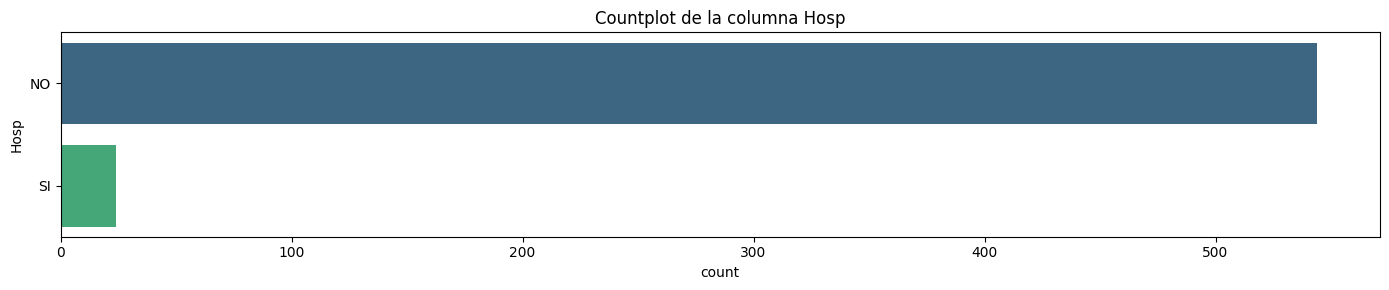

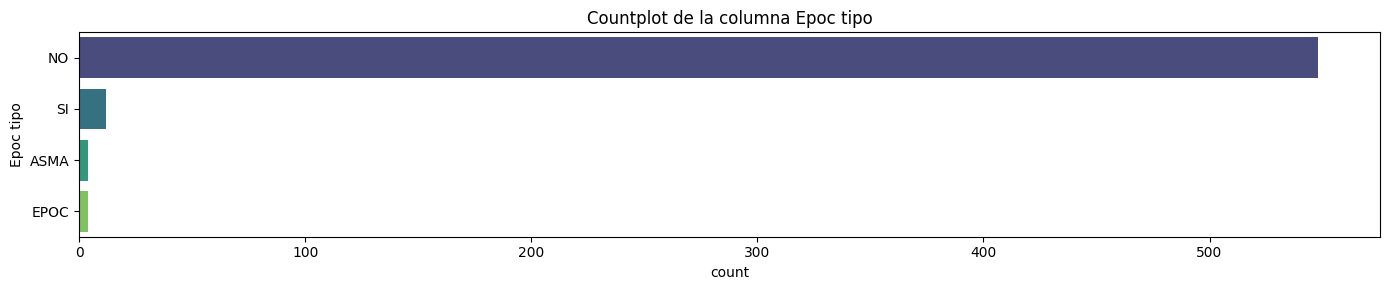

In [682]:
for c in df.select_dtypes(include=['object', 'category']):
    plt.figure(figsize=(14, 3))
    sns.countplot(data=df, y=c, palette="viridis")
    plt.title(f'Countplot de la columna {c}')
    plt.tight_layout()
    plt.show()

#### Algunas lecturas de las visualizaciones previas son:

* **Diabetes**, **Hosp_ult_mes**, **Biopsias_prev**, **CUP**, **Epoc**, **Fiebre**, **ITU** y **Hosp** clasifican la mayor cantidad de pacientes en la categoría de "NO".
* **Vol_prostatico** tiene la mayor cantidad de pacientes con "SI".
* **PSA** queda con mayoy cantidad de pacientes en el rango de 4 a 31 ng/ml.
* **Antib_en_profilaxis** tiene un alto porcentaje en la categoría fluoroquinolona_aminoglicosido.
* **Biopsia** tiene varias categorías con diferentes cantidades en cada una, es una de las variables con mayor diversidad de informacion. La mayor proporción de pacientes se clasifican en NEG (resultado negativo).
* **Tipo_cultivo** tiene un mayor porcentaje de pacientes con "NO", dado que no se realizaron cultivos, pero además presentan otras tres categorías (hemocultivo, urocultivo, hemocultivo y urocultivo) que podrían agruparse en una sola que puede ser 'SI' para describir que se solicitó algún tipo de cultivo. Por otro lado, **agente_aislado** es similar al anterior, donde mayormente es "NO" dado que no se pidió cultivo o que, si se pidió, no se aisló ningún agente. Pero a su vez tiene otras dos categorías con muy pocos pacientes donde el agente ailado es E. Coli o Pseudomonas aeruginosa.
* **patron_resistencia** tiene mayormente pacientes 'NO' que significa que no tienen ninguna resistencia a antibióticos, pero luego aparecen cuatro categorías mas con muy pocos pacientes en cada una con alguna combinación o grupo de antibióticos para los cuales desarrollan resistencia.

En el siguiente heatmap se puede apreciar de manera resumida el porcentaje de datos por cada una de las variables (eje y) y categorías de dichas variables (eje x). Se hace para evaluar si algunas de las variables es constante. En este caso se adopta como variable constante aquellas variables donde una de sus categorías superen el 99% de etiquetas de la misma categoría. Se adopta 99% porque la variable objetivo presenta cerca del 95% de las categorías con una sola clase y se busca eliminar variables con mayor cantidad de valores constantes.

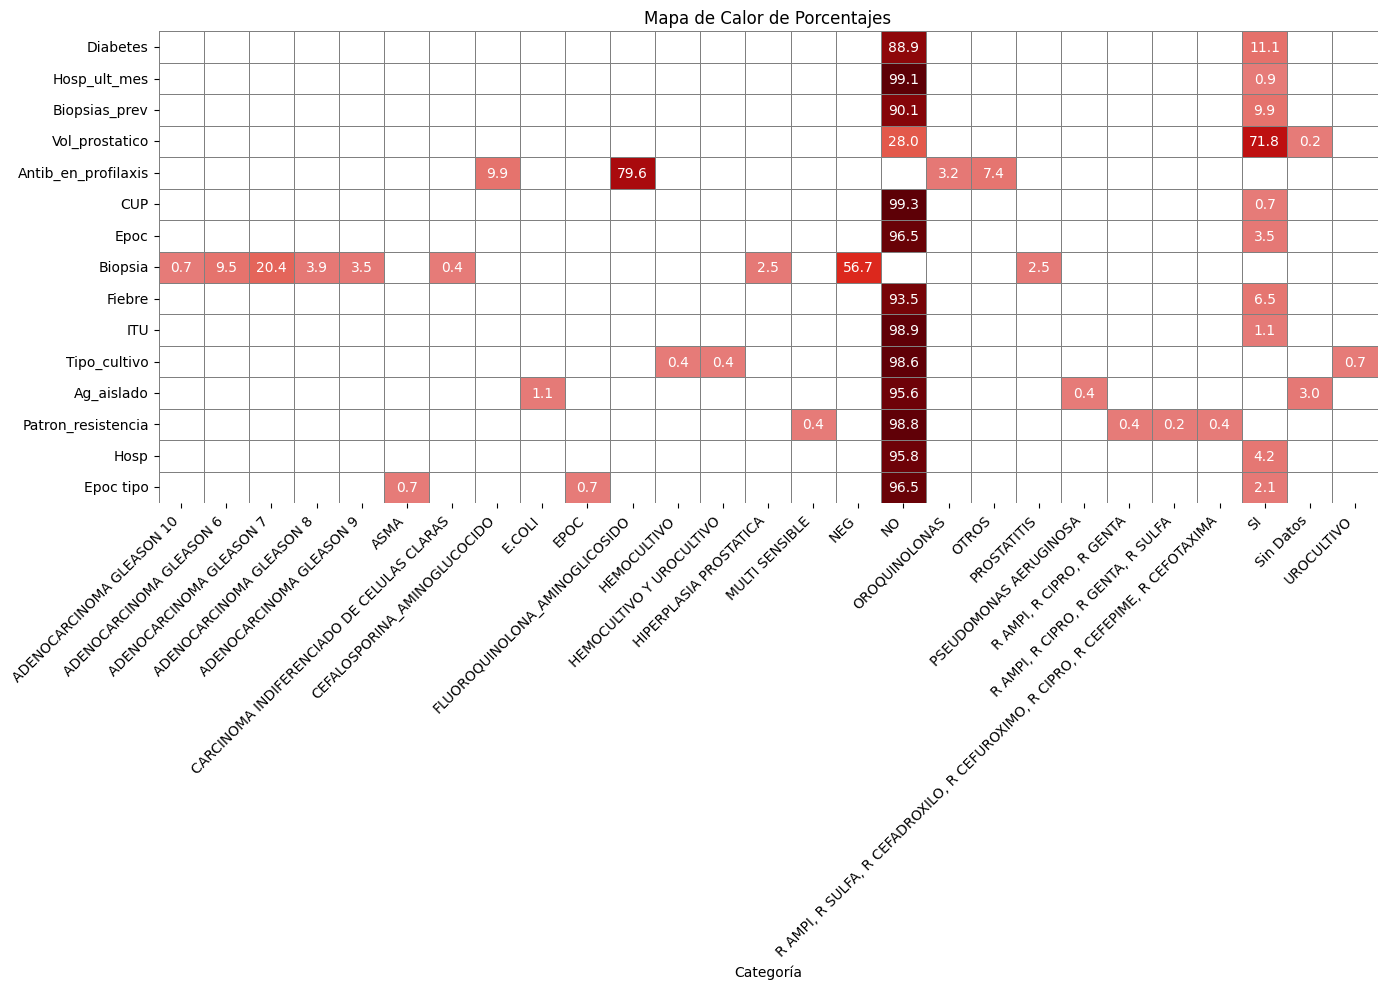

In [683]:
# Crea un dataframe de resumen
summary_df = pd.DataFrame()

# Iterar a través de cada columna en el DataFrame original
for column in df.columns:
    # Verificar si la columna es de tipo 'object'
    if df[column].dtype == 'object' or df[column].dtype == 'category':
        # Obtener las categorías únicas y sus recuentos
        category_counts = df[column].value_counts(normalize=True)
            
        # Crear un DataFrame temporal para esta columna
        temp_df = pd.DataFrame({
            'Categoría': category_counts.index,
            column: category_counts.values * 100
        })
            
        # Establecer la columna 'Categoría' como índice para el DataFrame temporal
        temp_df.set_index('Categoría', inplace=True)
            
        # Unir el DataFrame temporal al resumen general
        summary_df = pd.concat([summary_df, temp_df], axis=1, sort=True)

# Reemplazar los valores NaN con "null"
summary_df = summary_df.fillna(-1)
    
# crea la visualización
plt.figure(figsize=(14, 10))

# Crear una escala de colores personalizada
def custom_cmap(value, alpha=1.0):
    if value == -1:
        return (1, 1, 1, alpha)  # Blanco para el valor -1
    else:
        color = plt.get_cmap('Reds')(value / 100)
        adjusted_color = (color[0] * 0.9, color[1] * 0.5, color[2] * 0.5, alpha)
        return adjusted_color

num_colors = 100
cmap = LinearSegmentedColormap.from_list(
    'custom_cmap', [custom_cmap(i) for i in range(-1, num_colors + 1)], num_colors + 2)

ax = sns.heatmap(summary_df.transpose(), cmap=cmap, vmin=-1, vmax=num_colors, square=False, 
                annot=True, fmt=".1f", cbar=False, annot_kws={"color": "white"}, 
                linewidths=0.5, linecolor='grey')
plt.title("Mapa de Calor de Porcentajes")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

De este heatmap se identifican a **Hospitaliz_ult_mes** y **CUP** como variables donde el 99% de los datos es una sola categoría, en todos los caso 'NO', por lo que se decide borrarlos del conjunto de datos.

In [684]:
df = df.drop(['Hosp_ult_mes','CUP'], axis=1)
df.columns

Index(['Edad', 'Diabetes', 'PSA', 'Biopsias_prev', 'Vol_prostatico',
       'Antib_en_profilaxis', 'Nro_muestras', 'Epoc', 'Biopsia',
       'Nro_dias_hasta_infecc', 'Fiebre', 'ITU', 'Tipo_cultivo', 'Ag_aislado',
       'Patron_resistencia', 'Hosp', 'Epoc tipo'],
      dtype='object')

## Codificación del dataset

#### Como se tienen variables categóricas y se quiere estudiar si hay alta correlación de algunas variables con la variable objetivo, es necesario codificar dichas categorías en forma numérica. Además, este paso es necesario para que los datos puedan ser interpretados por los modelos de Machine Learning. A continuación, se hace la codificación.

In [685]:
encoded_df = herramientas.label_encode_categoricals(df)
encoded_df

,Edad,Diabetes,PSA,Biopsias_prev,Vol_prostatico,Antib_en_profilaxis,Nro_muestras,Epoc,Biopsia,Nro_dias_hasta_infecc,Fiebre,ITU,Tipo_cultivo,Ag_aislado,Patron_resistencia,Hosp,Epoc tipo
0,53.0,0,4.00,0,1,1,12.0,0,7,1,1,0,2,1,1,1,2
1,56.0,0,7.70,0,1,1,12.0,0,7,1,1,0,2,1,1,1,2
2,57.0,0,29.00,1,1,1,24.0,0,7,1,1,0,0,0,3,1,2
3,56.0,0,7.00,0,1,1,12.0,0,7,1,1,0,2,1,1,1,2
4,55.0,0,29.00,1,1,1,24.0,0,7,1,1,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67.0,0,6.00,0,1,1,12.0,0,1,0,0,0,2,1,1,0,2
564,64.0,0,4.80,0,1,3,12.0,0,2,0,0,0,2,1,1,0,2
565,69.0,0,4.43,0,2,1,20.0,0,7,0,0,0,2,1,1,0,2
566,67.0,0,8.00,0,1,1,12.0,0,2,0,0,0,2,3,1,0,2


## Correlación

#### Para finalizar, se analiza la correlación entre las variables que quedan del dataset para identificar variables con alta correlación entre sí o con la variable objetivo.

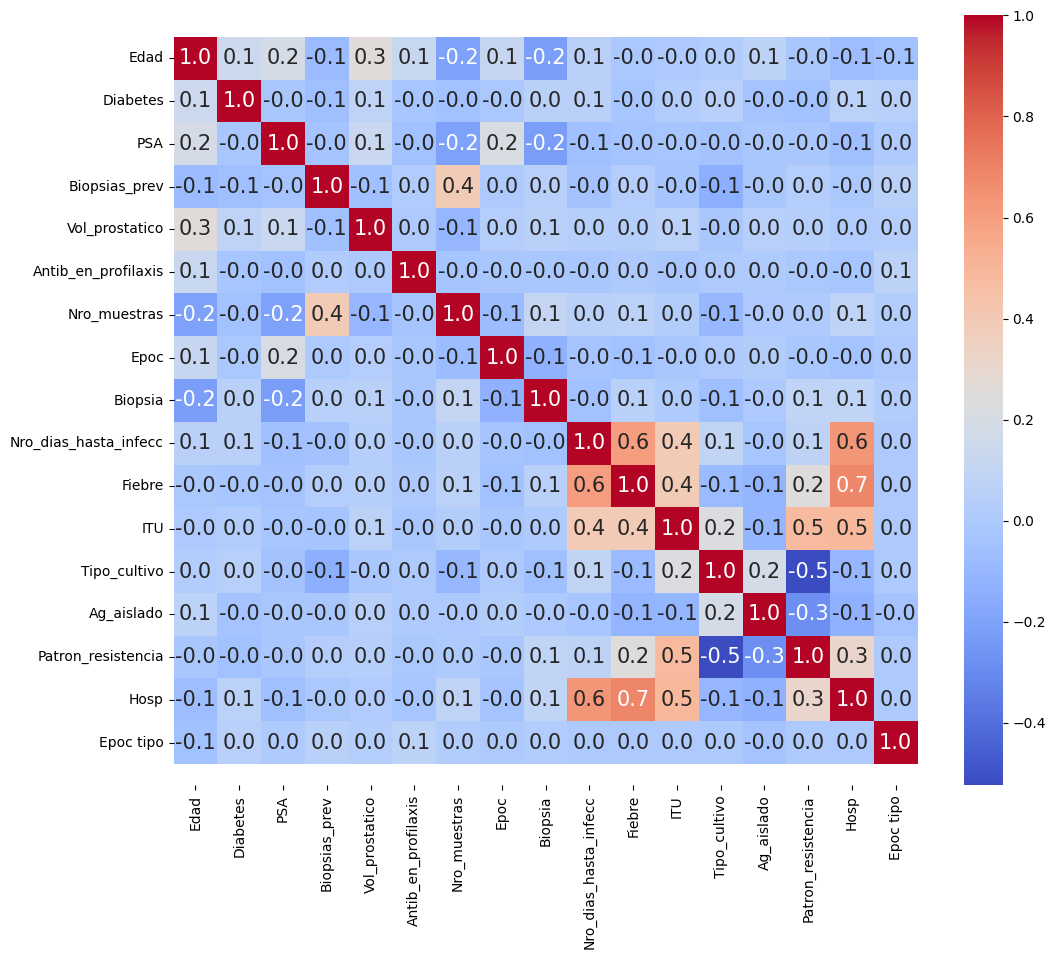

In [686]:
# Calcula la correlación
corr = encoded_df.corr()
# Grafica la correlación
herramientas.plot_corre_heatmap(corr)

#### De la matriz se observa que **Fiebre** y **Nro_dias_hasta_infecc** tienen alta correlación lineal entre ellas y con la variable objetivo **Hosp**. Se decide eliminar **Nro_dias_hasta_infecc** dado que Fiebre es una variable mas fácil de medir.

#### También se observa una relación bastante fuerte entre **Ag_aislado** con **Tipo_cultivo** y con **Patron_resistencia**, por lo que se decide eliminar *Ag_aislado* y *Patron_resistencia*.

In [687]:
df = df.drop(['Nro_dias_hasta_infecc', 'Ag_aislado', 'Patron_resistencia'], axis=1)
encoded_df = encoded_df.drop(['Nro_dias_hasta_infecc', 'Ag_aislado', 'Patron_resistencia'], axis=1)
df.columns, encoded_df.columns

(Index(['Edad', 'Diabetes', 'PSA', 'Biopsias_prev', 'Vol_prostatico',
        'Antib_en_profilaxis', 'Nro_muestras', 'Epoc', 'Biopsia', 'Fiebre',
        'ITU', 'Tipo_cultivo', 'Hosp', 'Epoc tipo'],
       dtype='object'),
 Index(['Edad', 'Diabetes', 'PSA', 'Biopsias_prev', 'Vol_prostatico',
        'Antib_en_profilaxis', 'Nro_muestras', 'Epoc', 'Biopsia', 'Fiebre',
        'ITU', 'Tipo_cultivo', 'Hosp', 'Epoc tipo'],
       dtype='object'))

#### Se visualiza nuevamente la matriz de correlación.

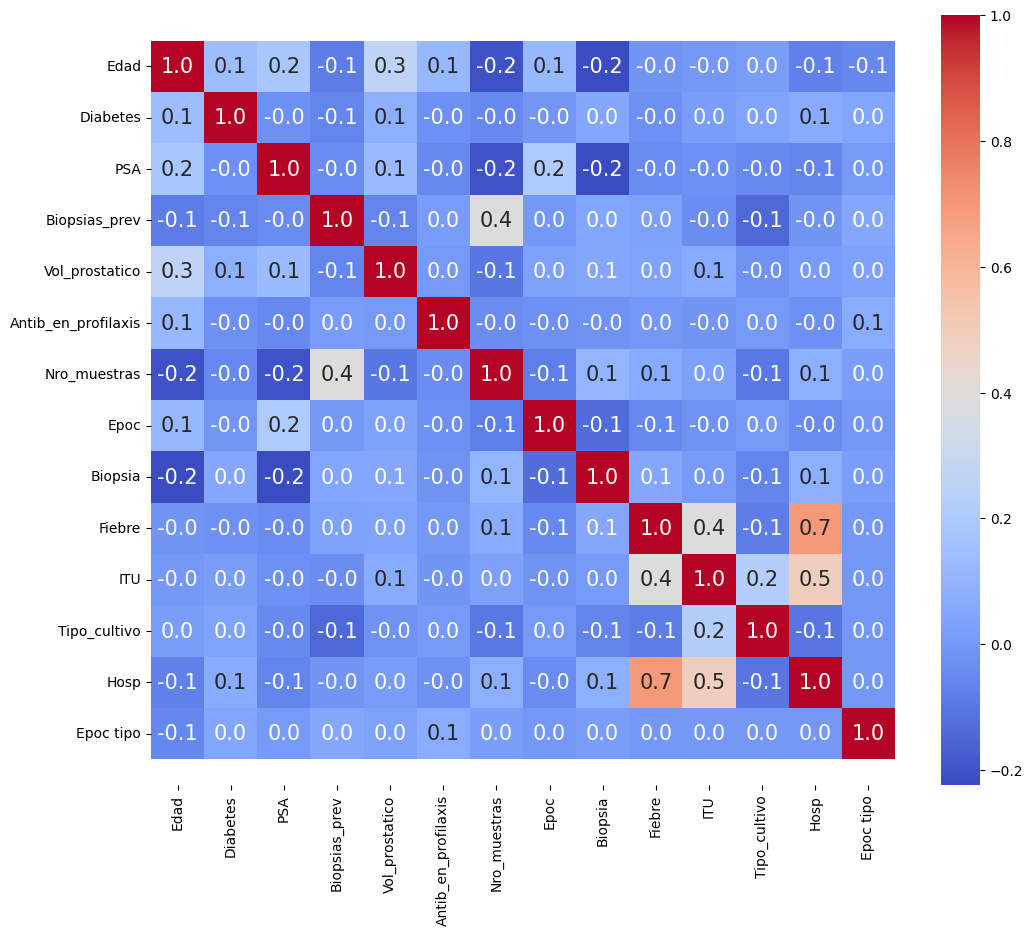

In [689]:
# Calcula la correlación
corr = encoded_df.corr()
# Grafica la correlación
herramientas.plot_corre_heatmap(corr)

#### Guardamos el Dataset limpio y analizado

In [688]:
df.to_csv(r'Datasets/BBDD_hospitalizacion_limpio.csv', index=False, encoding='utf-8')